In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
meta_path = '../preprocessed_dset/metadata.csv'
df = pd.read_csv(meta_path)
df

,trace_name,trace_start_time,network_code,receiver_name,receiver_type,receiver_elevation_m,receiver_latitude,receiver_longitude,source_id,source_depth_km,...,source_magnitude,source_origin_time,p_travel_sec,s_travel_sec,p_s_diff_sec,label,split,filename,associato,week
0,NRCA.IV.100099988_EV,2016-10-31 00:15:23.830000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100099988,6.455,...,2.14,2016-10-31 00:15:27.368,1.462,2.752,1.29,post,train,NRCA.IV.100099988_EV.png,0,44
1,NRCA.IV.100100306_EV,2016-10-31 00:52:25.610000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100100306,2.787,...,2.25,2016-10-31 00:52:29.149,1.461,3.281,1.82,post,train,NRCA.IV.100100306_EV.png,0,44
2,NRCA.IV.100100326_EV,2016-10-31 00:54:30.840000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100100326,3.751,...,2.60,2016-10-31 00:54:35.100,0.740,3.220,2.48,post,train,NRCA.IV.100100326_EV.png,0,44
3,NRCA.IV.100100799_EV,2016-10-31 01:48:19.170000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100100799,2.047,...,3.31,2016-10-31 01:48:22.398,1.772,3.442,1.67,post,train,NRCA.IV.100100799_EV.png,0,44
4,NRCA.IV.100100996_EV,2016-10-31 02:11:39.660000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100100996,5.819,...,2.08,2016-10-31 02:11:43.199,1.461,2.861,1.40,post,test,NRCA.IV.100100996_EV.png,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,NRCA.IV.100057770_EV,2016-10-26 13:42:07.610000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100057770,2.078,...,0.70,2016-10-26 13:42:11.545,1.065,2.105,1.04,pre,train,NRCA.IV.100057770_EV.png,0,43
5822,NRCA.IV.100057800_EV,2016-10-26 14:01:04.860000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100057800,6.330,...,1.40,2016-10-26 14:01:08.404,1.456,2.736,1.28,pre,train,NRCA.IV.100057800_EV.png,0,43
5823,NRCA.IV.100057809_EV,2016-10-26 14:08:41.830000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100057809,7.556,...,0.58,2016-10-26 14:08:45.331,1.499,2.829,1.33,pre,train,NRCA.IV.100057809_EV.png,0,43
5824,NRCA.IV.100057875_EV,2016-10-26 14:39:43.740000+00:00,IV,NRCA,HH,927.0,42.83355,13.11427,100057875,4.063,...,0.71,2016-10-26 14:39:47.563,1.177,2.227,1.05,pre,train,NRCA.IV.100057875_EV.png,0,43


In [4]:
# General Stats
total_traces = len(df)
train_traces = len(df[df['split'] == 'train'])
test_traces = len(df[df['split'] == 'test'])

print(f'Total traces: {total_traces}')
print(f'Training traces: {train_traces}')
print(f'Test traces: {test_traces}')

print('Training traces are then splitted with a 7-fold cross-validation.')
print('For each fold, 1/7 of the training traces are used for validation.')

Total traces: 5826
Training traces: 4661
Test traces: 1165
Training traces are then splitted with a 7-fold cross-validation.
For each fold, 1/7 of the training traces are used for validation.


In [5]:
pre_traces = df[df['label'] == 'pre']
post_traces = df[df['label'] == 'post']
print(f'Pre traces: {len(pre_traces)}')
print(f'Post traces: {len(post_traces)}')

Pre traces: 3632
Post traces: 2194


In [21]:
p_travel_sec_pre = np.array(df[(df['p_travel_sec'] > 0) & (df['label'] == 'pre')]['p_travel_sec'].values)
p_travel_sec_post = np.array(df[(df['p_travel_sec'] > 0) & (df['label'] == 'post')]['p_travel_sec'].values)

s_travel_sec_pre = np.array(df[(df['s_travel_sec'] > 0) & (df['label'] == 'pre')]['s_travel_sec'].values)
s_travel_sec_post = np.array(df[(df['s_travel_sec'] > 0) & (df['label'] == 'post')]['s_travel_sec'].values)

p_s_diff_sec_pre = np.array(df[(df['p_s_diff_sec'] > 0) & (df['label'] == 'pre')]['p_s_diff_sec'].values)
p_s_diff_sec_post = np.array(df[(df['p_s_diff_sec'] > 0) & (df['label'] == 'post')]['p_s_diff_sec'].values)

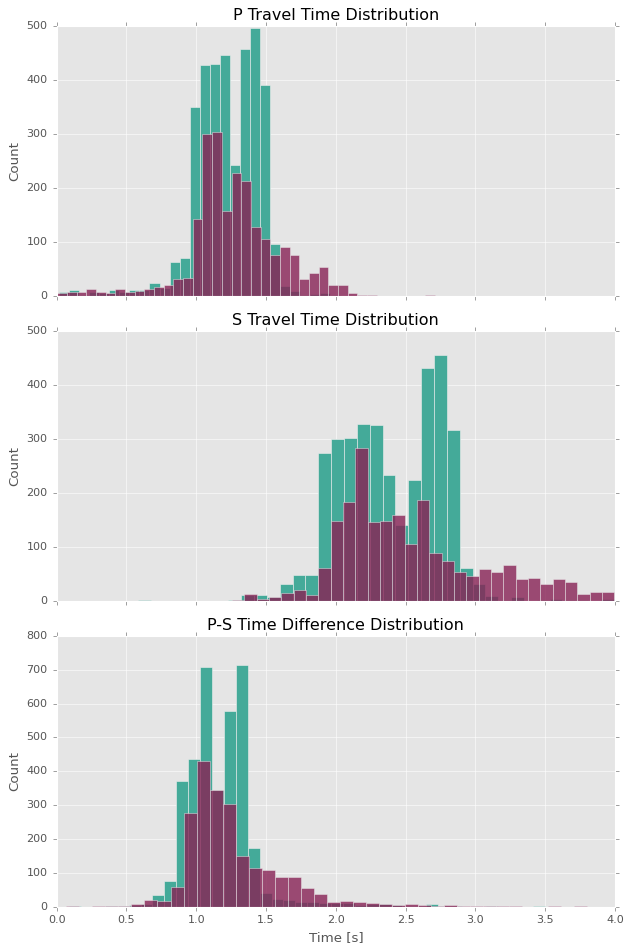

In [33]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')  # oppure 'classic', 'bmh', 'dark_background', ecc.

# Create the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Plot settings
alpha = 1
bins = 40

# Row 1 - p_travel_sec
axes[0].hist(p_travel_sec_pre, bins=bins, alpha=alpha, color="#44AA99", label='Pre')
axes[0].hist(p_travel_sec_post, bins=bins, alpha=.8, color="#882255", label='Post')
axes[0].set_title('P Travel Time Distribution')
axes[0].set_ylabel('Count')
#axes[0].legend()

# Row 2 - s_travel_sec
axes[1].hist(s_travel_sec_pre, bins=bins, alpha=alpha, color="#44AA99", label='Pre')
axes[1].hist(s_travel_sec_post, bins=bins, alpha=.8, color="#882255", label='Post')
axes[1].set_title('S Travel Time Distribution')
axes[1].set_ylabel('Count')
#axes[1].legend()

# Row 3 - p_s_diff_sec
axes[2].hist(p_s_diff_sec_pre, bins=bins, alpha=alpha, color="#44AA99", label='Pre')
axes[2].hist(p_s_diff_sec_post, bins=bins, alpha=.8, color="#882255", label='Post')
axes[2].set_title('P-S Time Difference Distribution')
axes[2].set_xlabel('Time [s]')
axes[2].set_ylabel('Count')
#axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('../plots/travel_time_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


In [31]:
weekly_df = df.groupby('week')['trace_start_time'].agg(start_time='min', end_time='max').reset_index()

# Ensure timestamps are converted to datetime, handling mixed formats
weekly_df['start_time'] = pd.to_datetime(weekly_df['start_time'], format='mixed')
weekly_df['end_time'] = pd.to_datetime(weekly_df['end_time'], format='mixed')

# Format the datetime to keep only "YYYY-MM-DD HH:MM:SS"
weekly_df['start_time'] = weekly_df['start_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
weekly_df['end_time'] = weekly_df['end_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Display without index
print(weekly_df.to_string(index=False))

 week          start_time            end_time
   33 2016-08-20 12:07:50 2016-08-20 12:07:50
   34 2016-08-24 01:33:55 2016-08-28 23:05:12
   35 2016-08-29 00:04:26 2016-09-04 23:59:15
   36 2016-09-05 00:09:29 2016-09-11 23:55:04
   37 2016-09-12 00:02:37 2016-09-18 22:18:08
   38 2016-09-19 00:01:12 2016-09-25 23:48:20
   39 2016-09-26 00:22:32 2016-10-02 22:47:02
   40 2016-10-03 00:26:49 2016-10-09 23:39:20
   41 2016-10-10 00:16:49 2016-10-16 23:44:24
   42 2016-10-17 00:24:41 2016-10-23 21:54:54
   43 2016-10-24 00:19:02 2016-10-26 14:49:08
   44 2016-10-31 00:15:23 2016-11-06 17:42:53
   45 2016-11-07 10:56:16 2016-11-13 19:51:28
   46 2016-11-14 01:20:37 2016-11-20 23:58:55
   47 2016-11-21 00:28:59 2016-11-27 23:13:51
   48 2016-11-28 00:34:36 2016-12-04 23:56:48
   49 2016-12-05 00:11:41 2016-12-11 07:28:17
   50 2016-12-13 22:14:28 2016-12-18 22:46:18
   51 2016-12-19 01:40:44 2016-12-20 06:27:59


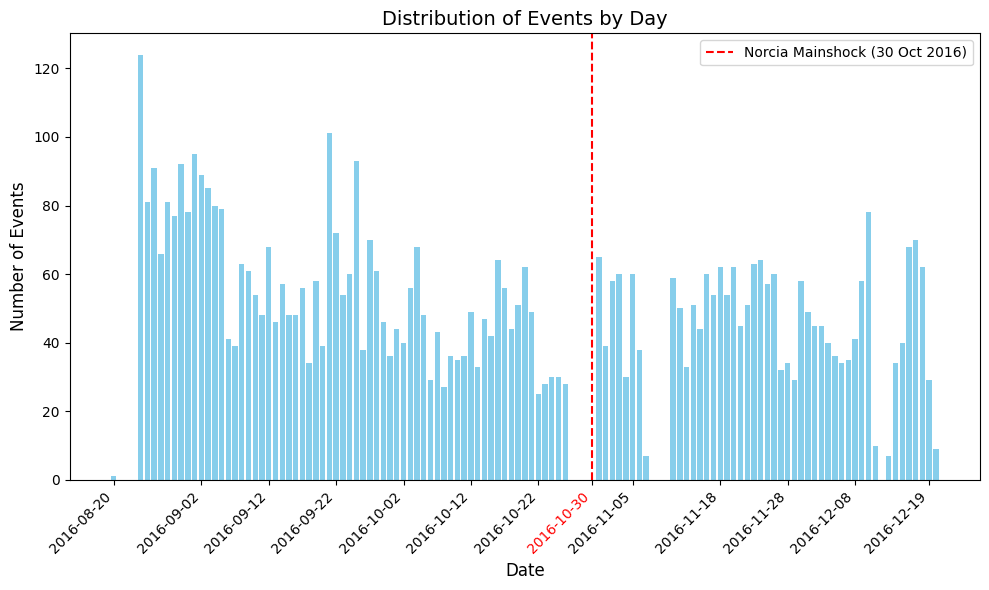

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert to datetime if not already
if not pd.api.types.is_datetime64_any_dtype(df['trace_start_time']):
    df['trace_start_time'] = pd.to_datetime(df['trace_start_time'], errors='coerce')

# Group by date
df['date'] = df['trace_start_time'].dt.date
event_counts = df['date'].value_counts().sort_index()

# Convert dates to numerical values for proper alignment
dates_num = mdates.date2num(event_counts.index)

# Plot using plt.bar instead of event_counts.plot(kind='bar')
plt.figure(figsize=(10, 6))
plt.bar(dates_num, event_counts.values, color='skyblue')

# Mark the mainshock date
mainshock_date = pd.to_datetime('2016-10-30').date()
mainshock_num = mdates.date2num(mainshock_date)
plt.axvline(x=mainshock_num, color='red', linestyle='--', label='Norcia Mainshock (30 Oct 2016)')

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Force October 30, 2016, to appear in x-ticks
xticks_dates = list(event_counts.index[::10])  # Pick every 10th date for readability
if mainshock_date not in xticks_dates:
    xticks_dates.append(mainshock_date)  # Ensure 30 Oct 2016 is there
xticks_dates = sorted(xticks_dates)  # Sort to keep order

# Convert to numerical values for x-ticks
xticks_numeric = mdates.date2num(xticks_dates)
xtick_labels = [d.strftime('%Y-%m-%d') for d in xticks_dates]

# Apply the ticks
plt.xticks(xticks_numeric, xtick_labels, rotation=45, ha='right')

# Make the mainshock tick red
for tick, label in zip(plt.gca().get_xticklabels(), xticks_dates):
    if label == mainshock_date:
        tick.set_color('red')  # Set the color of the mainshock date

plt.title('Distribution of Events by Day', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('../plots/events_by_day.png', dpi=300)
plt.show()


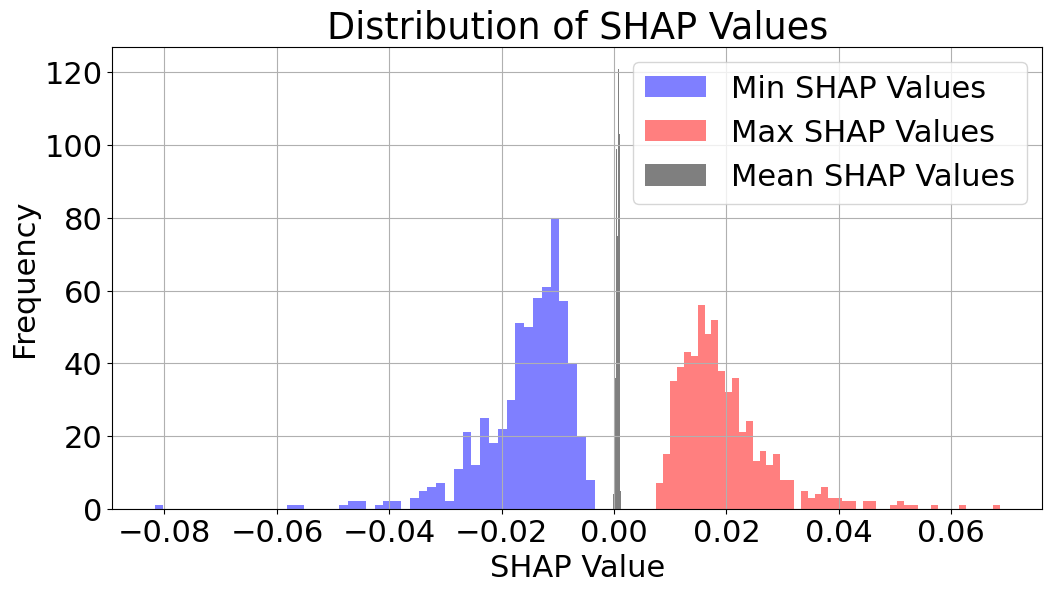

In [9]:
shap_folder_pre = 'shap_tensors/foreshocks'
shap_folder_post = 'shap_tensors/aftershocks'

shap_files = [(shap_folder_pre, f) for f in os.listdir(shap_folder_pre) if f.endswith('.npy')]
shap_files += [(shap_folder_post, f) for f in os.listdir(shap_folder_post) if f.endswith('.npy')]

mins, maxs, means = [], [], []

for folder, filename in shap_files:
    filepath = os.path.join(folder, filename)
    shap_tensor = np.load(filepath)

    mins.append(np.min(shap_tensor))
    maxs.append(np.max(shap_tensor))
    means.append(np.mean(shap_tensor))

# Histogram of min, maxs means of SHAP values
plt.figure(figsize=(12, 6))
plt.hist(mins, bins=50, alpha=0.5, label='Min SHAP Values', color='blue')
plt.hist(maxs, bins=50, alpha=0.5, label='Max SHAP Values', color='red')
plt.hist(means, bins=10, alpha=0.5, label='Mean SHAP Values', color='black')
plt.title('Distribution of SHAP Values')
plt.xlabel('SHAP Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

(160, 4)


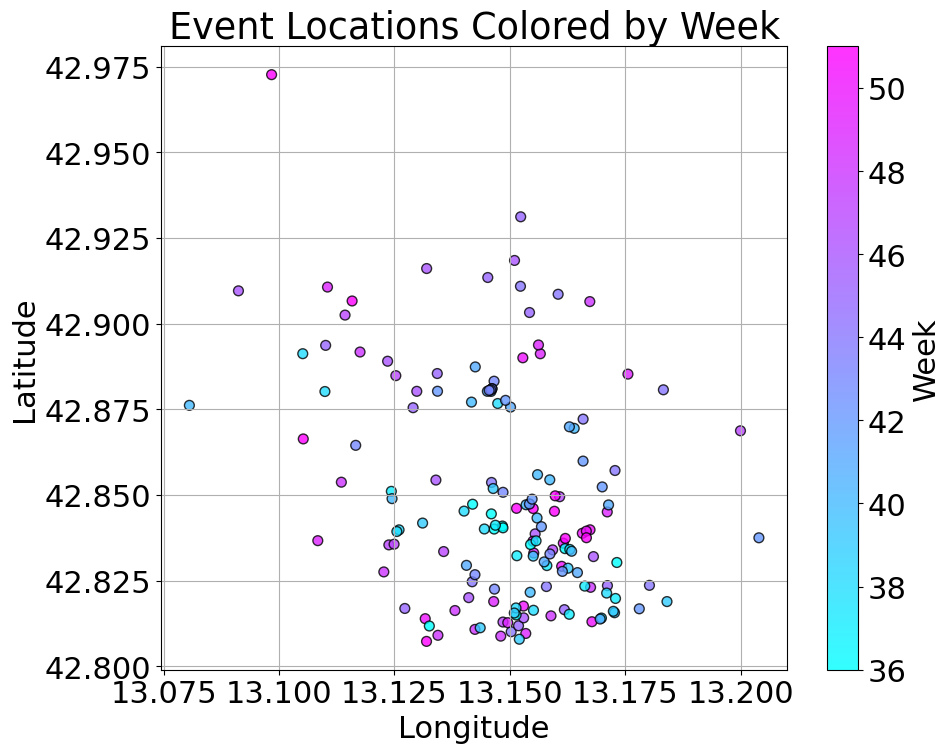

In [18]:
shap_folder = 'shap_tensors/temporal'
trace_names = [f.removesuffix('.npy') for f in os.listdir(shap_folder) if f.endswith('.npy')]

temporal_df = temporal_df = df[(df['trace_name'].isin(trace_names)) & (df['week'] >= 36)][["source_latitude", "source_longitude", "trace_name", "week"]]
print(temporal_df.shape)

plt.figure(figsize=(10, 8))

# Create scatter plot
sc = plt.scatter(
    temporal_df['source_longitude'], 
    temporal_df['source_latitude'], 
    c=temporal_df['week'], 
    cmap='cool', 
    s=50, 
    edgecolor='k', 
    alpha=0.8
)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Week')

# Plot settings
plt.title('Event Locations Colored by Week')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()
